# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [196]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Operacja LUT
**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).


W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

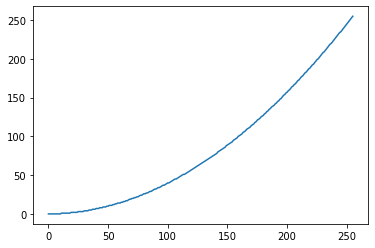

In [197]:
import lut
plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

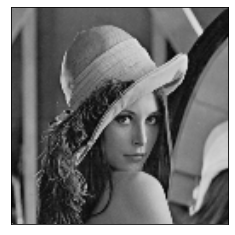

In [198]:
import os

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

I = cv2.imread('lena.bmp')
plt.xticks([]), plt.yticks([])
plt.imshow(I)
plt.show()


Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

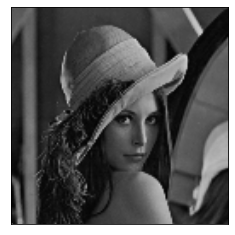

In [199]:
import os
import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

I = cv2.imread('lena.bmp')
I2 = cv2.LUT(I, lut.wykladnicza)
plt.xticks([]), plt.yticks([])
plt.imshow(I2)
plt.show()




Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [200]:
def LUT(original, coding_tab):
    Im = cv2.LUT(original, coding_tab)
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
    ax1.set_title("Original image")
    ax2.set_title("Recoding table")
    ax2.set_aspect('equal')
    ax3.set_title("Result")
    ax1.imshow(original)
    ax2.plot(coding_tab)
    ax3.imshow(Im)
    plt.show()


Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

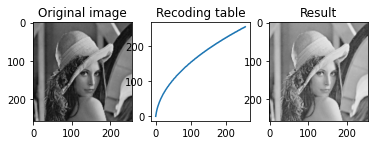

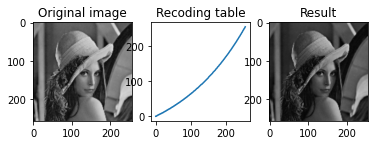

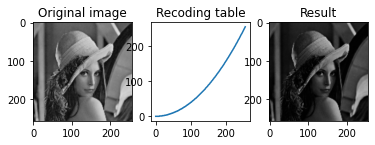

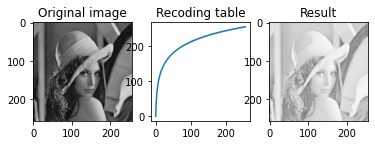

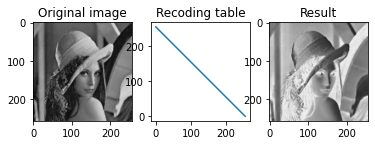

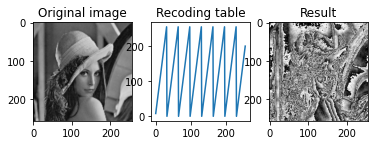

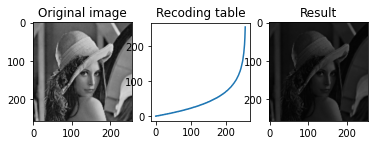

In [201]:
LUT(I, lut.pierwiastkowa)
LUT(I,lut.wykladnicza)
LUT(I,lut.kwadratowa)
LUT(I,lut.log)
LUT(I,lut.odwrotna)
LUT(I,lut.pila)
LUT(I,lut.odwlog)


## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

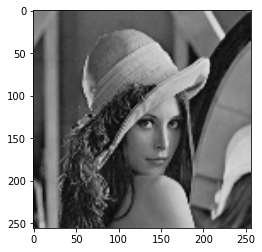

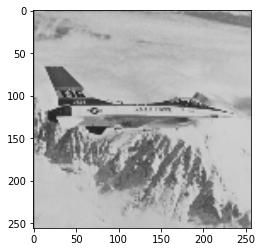

In [202]:
if not  os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

I = cv2.imread('lena.bmp')
I2 = cv2.imread('jet.bmp')

plt.imshow(I)
plt.show()
plt.imshow(I2)
plt.show()


Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

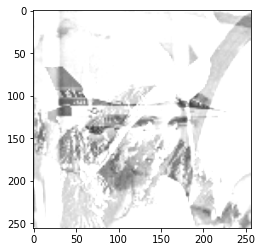

In [203]:
I3 = cv2.add(I, I2)
plt.imshow(I3)
plt.show()




Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

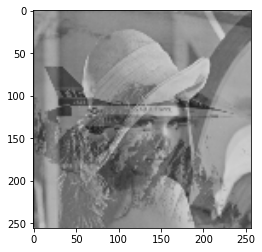

In [204]:
I4 = cv2.add(I.astype('uint16'), I2.astype('uint16'))
plt.imshow((I4/2).astype('uint8'))
plt.show()


### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

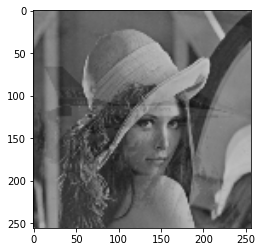

In [205]:
I5 = cv2.addWeighted(I, 0.7, I2, 0.2, 0)
plt.imshow(I5)
plt.show()


### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

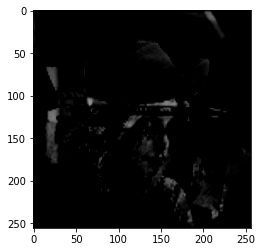

In [206]:
I6 = cv2.subtract(I, I2)
plt.imshow(I6)
plt.show()


Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

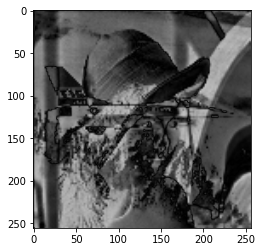

In [207]:
I7 = cv2.subtract(I.astype('int16'), I2.astype('int16'))
I8 = np.abs(I7)
plt.imshow(I8)
plt.show()


### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

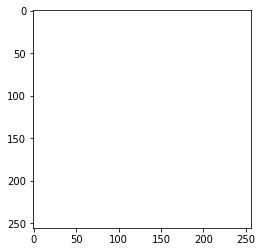

In [208]:
I9 = cv2.multiply(I, I2)
plt.imshow(I9)
plt.show()


Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

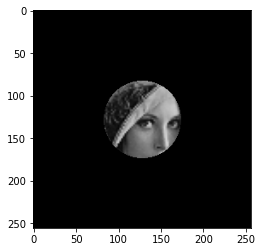

In [209]:
circle = cv2.imread('kolo.bmp')
I10 = cv2.multiply(I, circle.astype('bool').astype('uint8'))
plt.imshow(I10)
plt.show()


### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

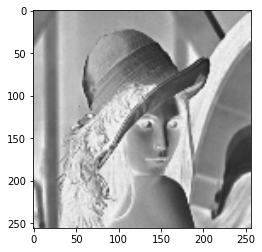

In [210]:
I11 = cv2.bitwise_not(I)
plt.imshow(I11)
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

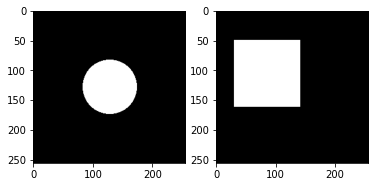

In [211]:
square = cv2.imread('kwadrat.bmp')
f, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(circle)
ax2.imshow(square)
plt.show()



Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

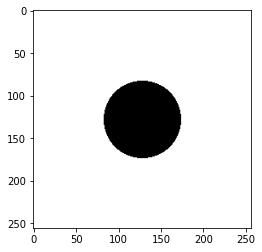

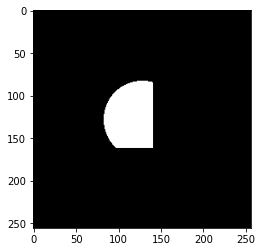

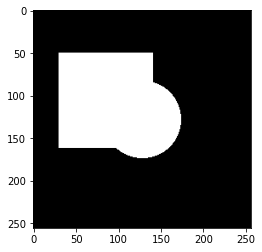

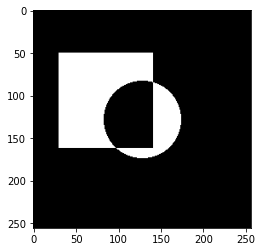

In [212]:
ImNot = ~circle
plt.imshow(ImNot)
plt.show()
ImAND = circle & square
plt.imshow(ImAND)
plt.show()
ImOR = circle | square
plt.imshow(ImOR)
plt.show()
ImXOR = circle ^ square
plt.imshow(ImXOR)
plt.show()


## Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

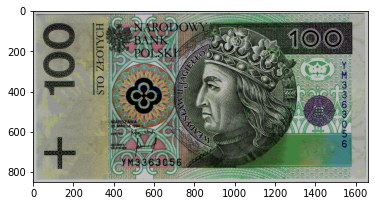

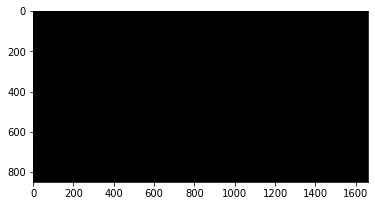

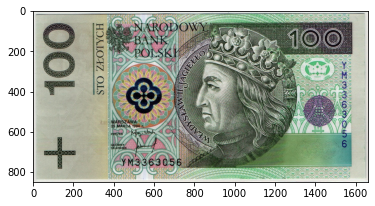

In [213]:
if not os.path.exists('100zloty.jpg') :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
im_100 = cv2.imread("100zloty.jpg")

bps = []

for i in range(8):
    bps.append((im_100 >> i) & 1)

im1 = ((2 ** 7) * bps[7]) + ((2 ** 6) * bps[6])
im2 = ((2 ** 1) * bps[1]) + ((2 ** 0) * bps[0])

im3 = ((2 ** 0) * bps[0])
for i, im in enumerate(bps[1:]):
    im3 += (2 ** (i + 1)) * im

plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()
plt.imshow(im3)
plt.show()



